In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

Preprocessing:

In [53]:
df = pd.read_csv('project_dataset.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

In [54]:
df = df[df['Dept'] == 21]
df.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,21.0,8907.63,42.31,2.572,211.096358,8.106
2010-02-12,1,21.0,8735.83,38.51,2.548,211.242170,8.106
2010-02-19,0,21.0,8949.67,39.93,2.514,211.289143,8.106
2010-02-26,0,21.0,8592.42,46.63,2.561,211.319643,8.106
2010-03-05,0,21.0,8275.44,46.50,2.625,211.350143,8.106


In [55]:
df.columns

Index(['IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [67]:
df.describe()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.069930,21.0,7808.450559,68.306783,3.219699,215.996892,7.610420
std,0.255926,0.0,1067.245018,14.250486,0.427313,4.350890,0.383749
min,0.000000,21.0,5898.290000,35.400000,2.514000,210.337426,6.573000
25%,0.000000,21.0,7144.920000,58.265000,2.764500,211.549277,7.348000
50%,0.000000,21.0,7662.310000,69.640000,3.290000,215.459905,7.787000
75%,0.000000,21.0,8301.205000,80.485000,3.594000,220.531330,7.838000
max,1.000000,21.0,13551.980000,91.650000,3.907000,223.444251,8.106000


Data Exploration:

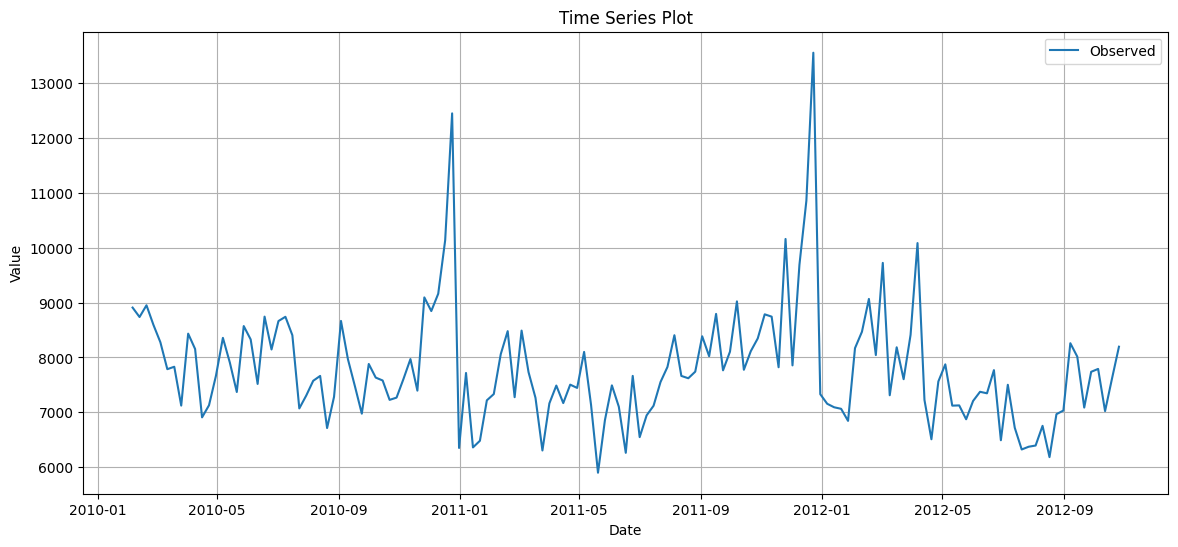

In [56]:
plt.figure(figsize=(14, 6))
plt.plot(df['Weekly_Sales'], label='Observed')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

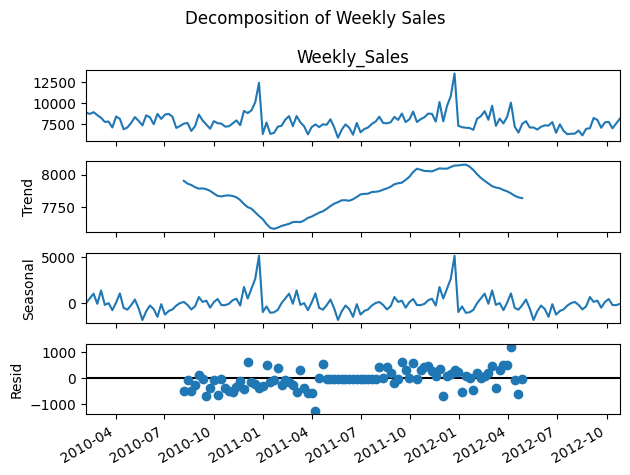

In [57]:
decomp = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)  # weekly data, so ~52 weeks/year
decomp.plot()
plt.suptitle("Decomposition of Weekly Sales")
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

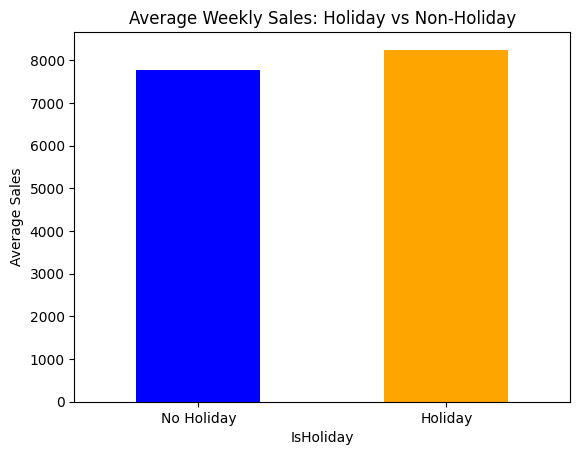

In [61]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ['No Holiday', 'Holiday'], rotation=0)
plt.show()

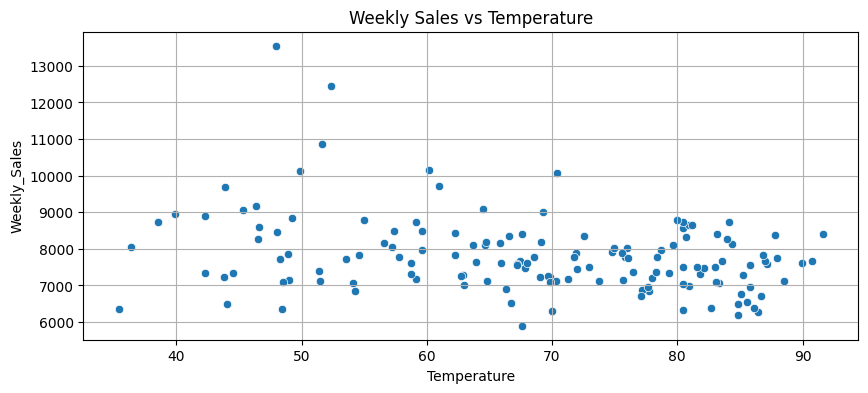

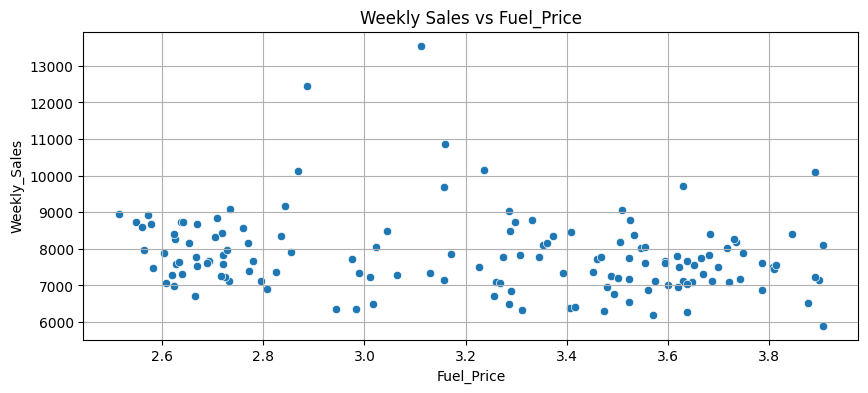

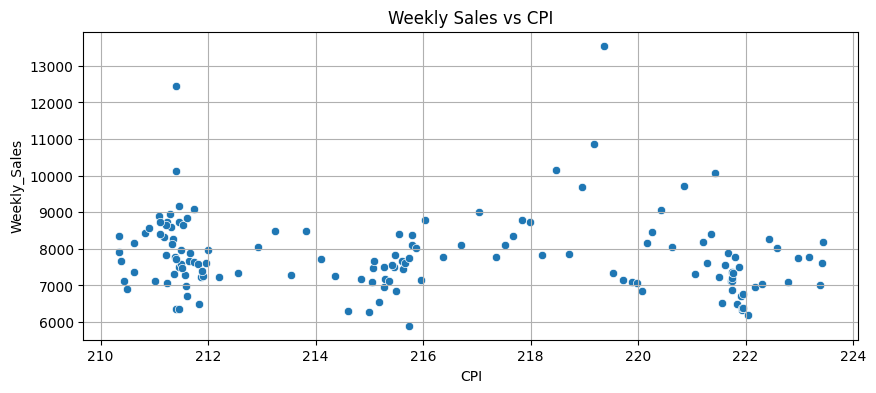

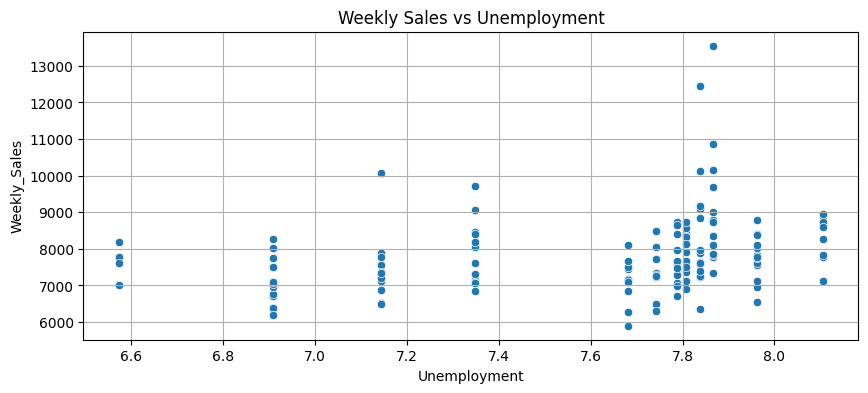

In [62]:
for col in features[1:]:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x=col, y='Weekly_Sales')
    plt.title(f'Weekly Sales vs {col}')
    plt.grid(True)
    plt.show()

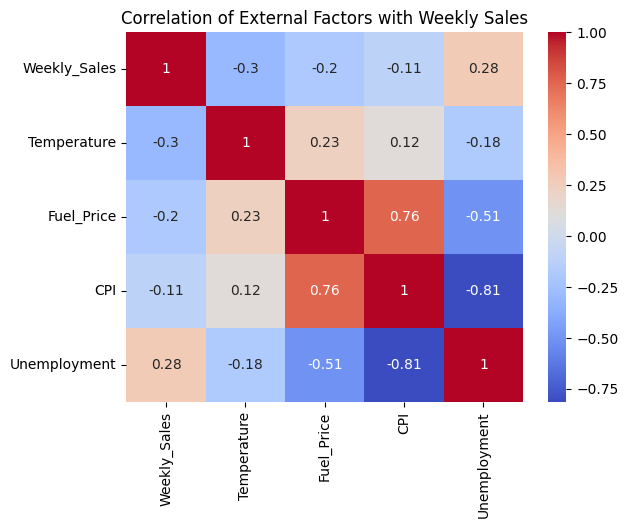

In [63]:
import seaborn as sns

features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of External Factors with Weekly Sales')
plt.show()

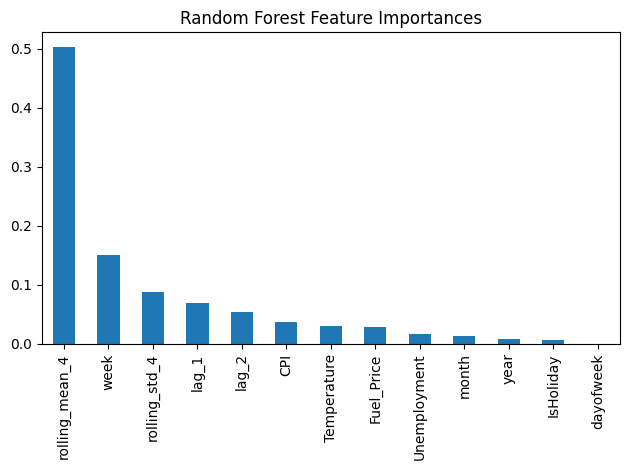

In [128]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', title='Random Forest Feature Importances')
plt.tight_layout()
plt.show()

ACF/PACF:

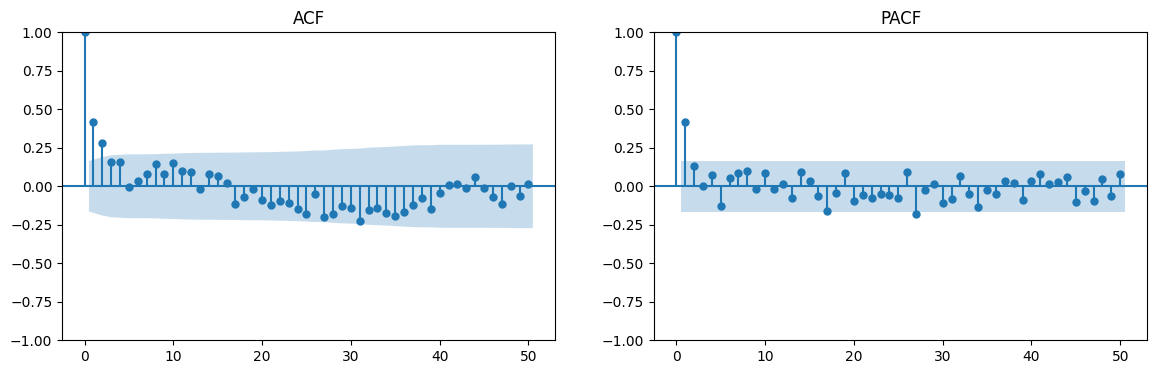

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df['Weekly_Sales'].dropna(), lags=50, ax=axes[0])
plot_pacf(df['Weekly_Sales'].dropna(), lags=50, ax=axes[1], method='ywm')
axes[0].set_title('ACF')
axes[1].set_title('PACF')
plt.show()

Exponential Smoothing:

In [71]:
series = df['Weekly_Sales'].dropna()
train = series[:-12]
test = series[-12:]

Holt-Winters:

In [81]:
model_holt = Holt(train).fit()
pred_holt = model_holt.forecast(len(test))

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


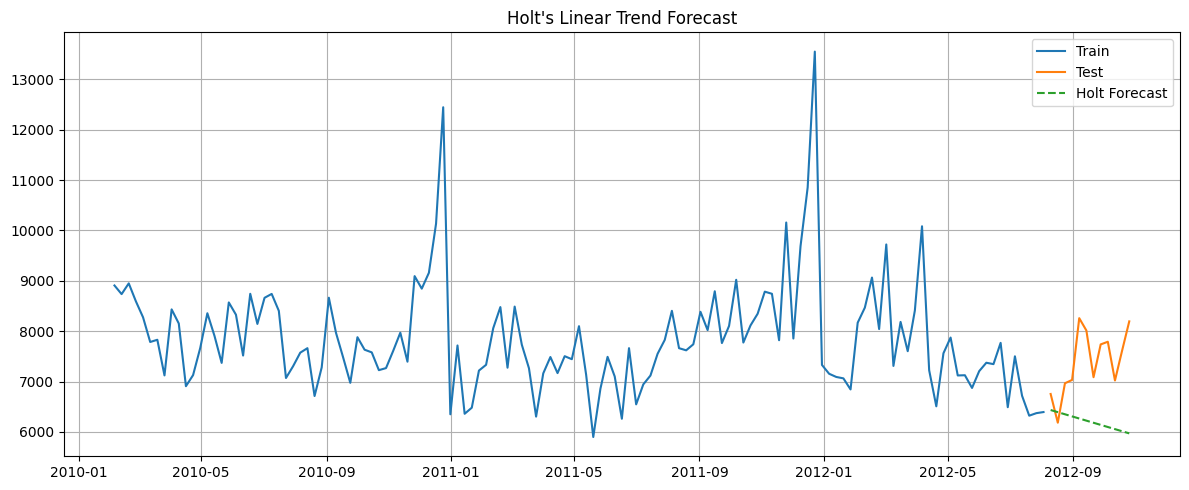

In [82]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred_holt, label='Holt Forecast', linestyle='--')
plt.title("Holt's Linear Trend Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
rmse_holt = np.sqrt(mean_squared_error(test, pred_holt))
print(f"Holt RMSE: {rmse_holt:.2f}")

Holt RMSE: 1381.75


In [72]:
model_hw = ExponentialSmoothing(
    train,
    trend='additive',
    seasonal='additive',
    seasonal_periods=52
).fit()

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [73]:
pred_hw = model_hw.forecast(len(test))

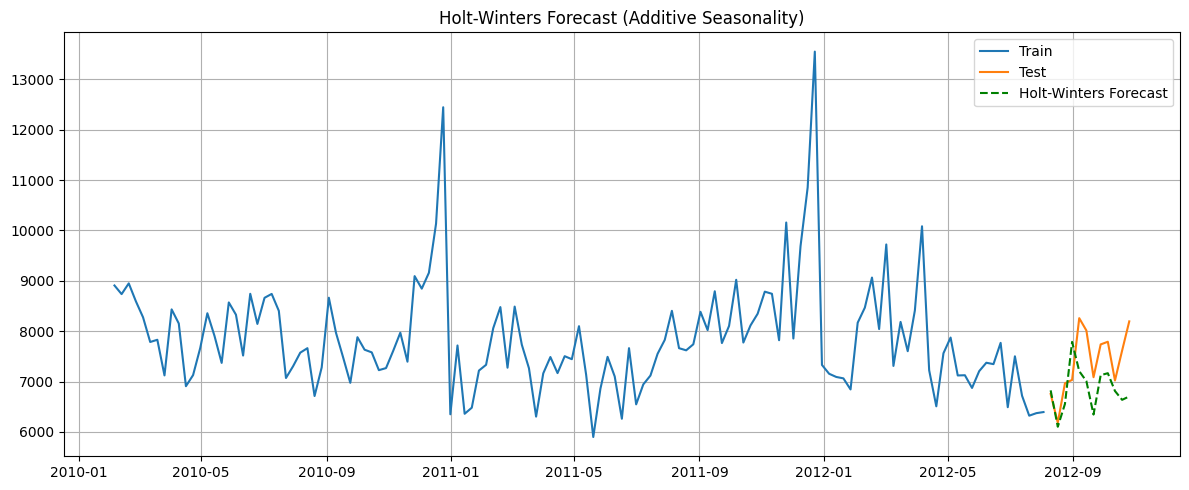

Holt-Winters RMSE: 785.66


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred_hw, label='Holt-Winters Forecast', linestyle='--', color='green')
plt.title("Holt-Winters Forecast (Additive Seasonality)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
rmse_hw = np.sqrt(mean_squared_error(test, pred_hw))
print(f"Holt-Winters RMSE: {rmse_hw:.2f}")

Holt-Winters RMSE: 785.66


Adfuller:

In [78]:
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.615525685910195
p-value: 1.1768136874544451e-06


In [79]:
ts = df['Weekly_Sales'].dropna()

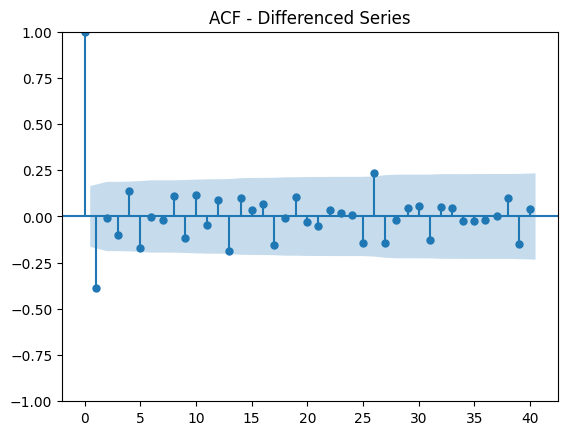

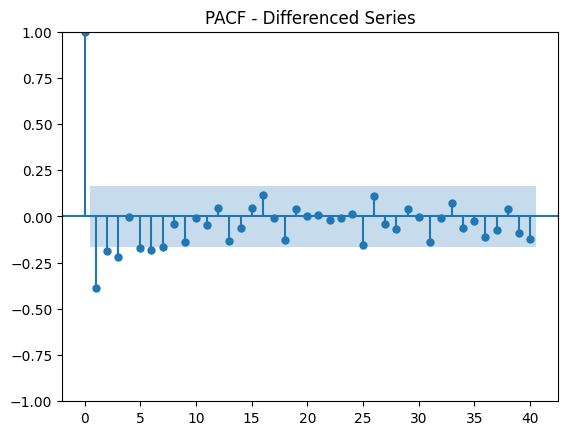

In [80]:
plot_acf(ts.diff().dropna(), lags=40)
plt.title('ACF - Differenced Series')
plt.show()

plot_pacf(ts.diff().dropna(), lags=40, method='ywm')
plt.title('PACF - Differenced Series')
plt.show()

ARIMA:

In [84]:
from statsmodels.tsa.arima.model import ARIMA

In [85]:
train = ts[:-12]
test = ts[-12:]

In [189]:
ARIMA_model = ARIMA(train, order=(1, 1, 1)).fit()

forecast = ARIMA_model.forecast(steps=len(test))

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


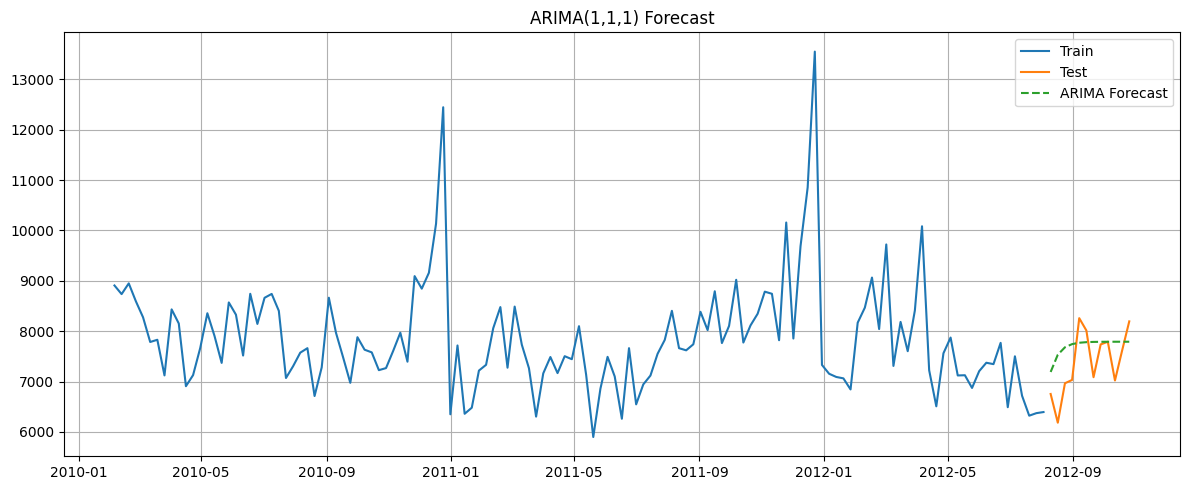

In [190]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.title("ARIMA(1,1,1) Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [191]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'ARIMA RMSE: {rmse:.2f}')

ARIMA RMSE: 619.32


SARIMA:

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
series = df['Weekly_Sales'].dropna()
train = series[:-12]
test = series[-12:]

In [194]:
SARIMA_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

forecast = SARIMA_model.forecast(steps=len(test))

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


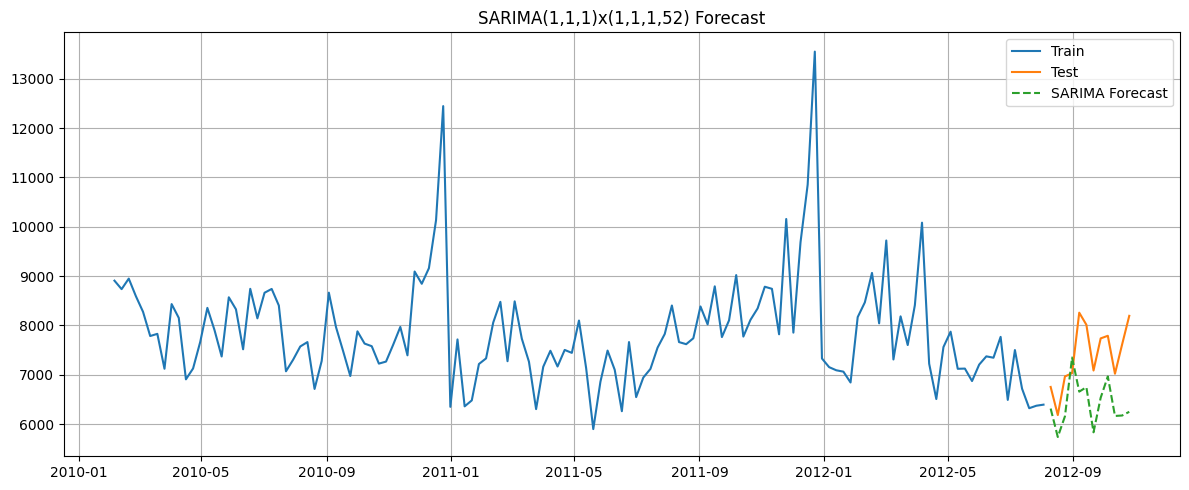

In [195]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast', linestyle='--')
plt.title("SARIMA(1,1,1)x(1,1,1,52) Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"SARIMA RMSE: {rmse:.2f}")

SARIMA RMSE: 1140.14


SARIMAX:

In [197]:
y = df['Weekly_Sales']

In [198]:
exog_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
X = df[exog_vars]

In [199]:
y_train, y_test = y[:-12], y[-12:]
X_train, X_test = X[:-12], X[-12:]

In [200]:
SARIMAX_model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnin

In [201]:
print(SARIMAX_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  131
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -187.397
Date:                            Sun, 22 Jun 2025   AIC                            394.793
Time:                                    16:12:05   BIC                            406.574
Sample:                                02-05-2010   HQIC                           397.918
                                     - 08-03-2012                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature     41.7960     29.298      1.427      0.154     -15.627      99.219
Fuel_Price    3074.1456   184

In [205]:
forecast = SARIMAX_model.forecast(steps=len(y_test), exog=X_test)

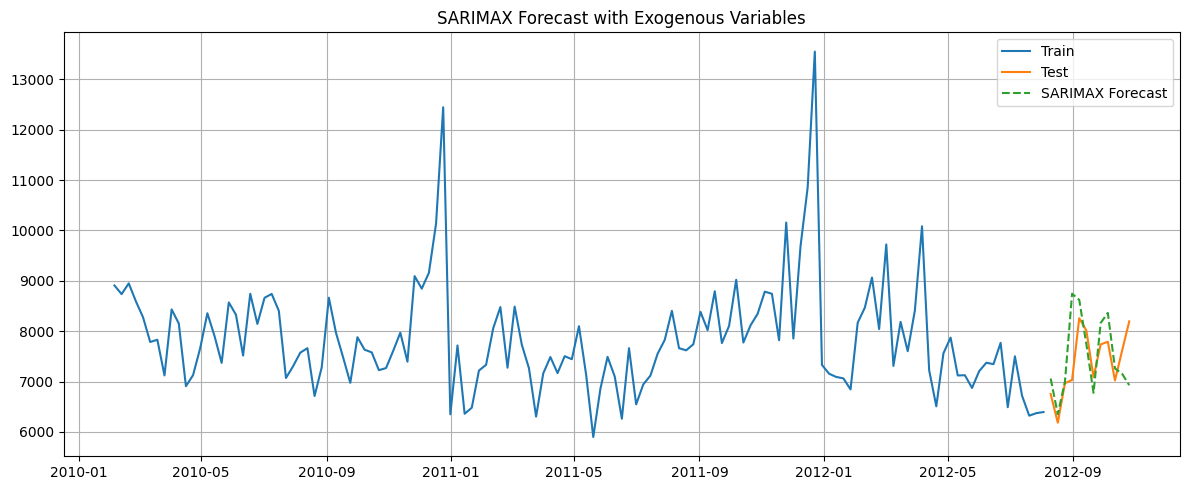

In [206]:
plt.figure(figsize=(12, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, forecast, label='SARIMAX Forecast', linestyle='--')
plt.title("SARIMAX Forecast with Exogenous Variables")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [207]:
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'SARIMAX RMSE: {rmse:.2f}')

SARIMAX RMSE: 691.91


Machine Learning Regressors:

In [114]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [116]:
df_copy = df.copy()

In [117]:
df_copy['lag_1'] = df_copy['Weekly_Sales'].shift(1)
df_copy['lag_2'] = df_copy['Weekly_Sales'].shift(2)
df_copy['rolling_mean_4'] = df_copy['Weekly_Sales'].rolling(4).mean()  # 4-week average
df_copy['rolling_std_4'] = df_copy['Weekly_Sales'].rolling(4).std()

In [118]:
df_copy['week'] = df_copy.index.isocalendar().week.astype(int)
df_copy['month'] = df_copy.index.month
df_copy['dayofweek'] = df_copy.index.dayofweek
df_copy['year'] = df_copy.index.year

In [119]:
target = 'Weekly_Sales'
exog_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
engineered_vars = ['lag_1', 'lag_2', 'rolling_mean_4', 'rolling_std_4', 'week', 'month', 'dayofweek', 'year']

In [121]:
features = exog_vars + engineered_vars
X = df_copy[features]
y = df_copy[target]

In [122]:
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

In [123]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [124]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

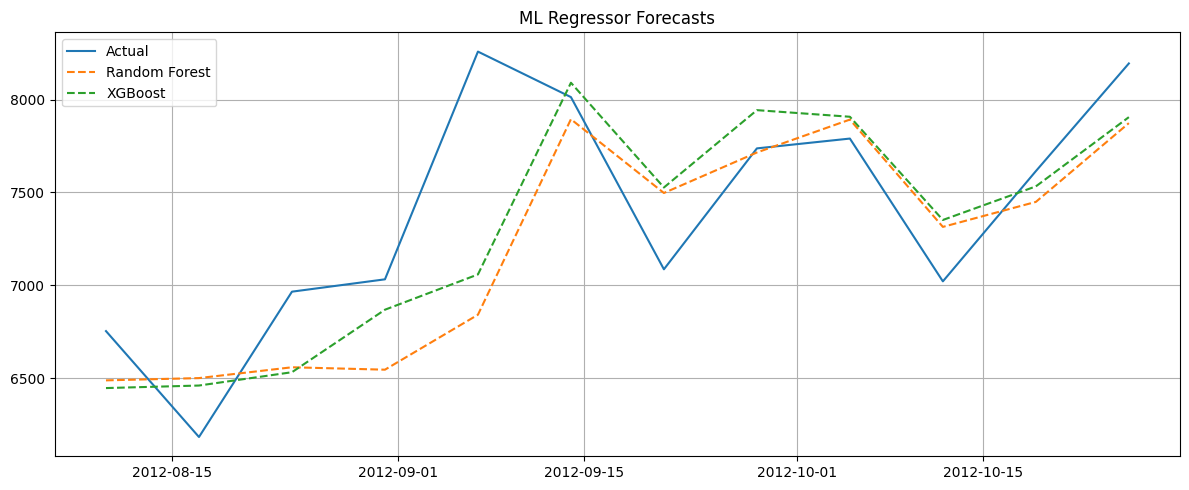

In [125]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_preds, label='Random Forest', linestyle='--')
plt.plot(y_test.index, xgb_preds, label='XGBoost', linestyle='--')
plt.title("ML Regressor Forecasts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print("Random Forest RMSE:", rf_preds)
print("XGBoost RMSE:", xgb_rmse)

Random Forest RMSE: [6487.5006 6499.7387 6557.9951 6545.0089 6841.0692 7894.2216 7496.8554
 7715.059  7892.2255 7314.2598 7448.8832 7873.2223]
XGBoost RMSE: 436.205653329461


Deep Learning Models:

In [146]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

In [132]:
ts = df['Weekly_Sales'].values.reshape(-1, 1)

In [133]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

In [135]:
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [136]:
window = 12
X, y = create_sequences(ts_scaled, window)

In [137]:
split = -12
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

ANN:

In [138]:
model_ann = Sequential([
    Flatten(input_shape=(window, 1)),
    Dense(64, activation='relu'),
    Dense(1)
])
model_ann.compile(optimizer='adam', loss='mse')
model_ann.fit(X_train, y_train, epochs=50, verbose=0)

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


RNN:

In [139]:
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=50, verbose=0)

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM:|

In [140]:
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(window, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, verbose=0)

In [150]:
model_deep_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model_deep_lstm.compile(optimizer='adam', loss='mse')
model_deep_lstm.summary()

model_deep_lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,489 (123.00 KB)

 Trainable params: 31,489 (123.00 KB)

 Non-trainable params: 0 (0.00 B)

GRU:

In [142]:
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(window, 1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=50, verbose=0)

CNN:

In [141]:
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(window, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.fit(X_train, y_train, epochs=50, verbose=0)

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [147]:
model_deep_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(window, 1)),
    BatchNormalization(),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_deep_cnn.compile(optimizer='adam', loss='mse')
model_deep_cnn.summary()

model_deep_cnn.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 10, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 8, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,113 (227.00 KB)

 Trainable params: 57,985 (226.50 KB)

 Non-trainable params: 128 (512.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
ANN RMSE: 630.51


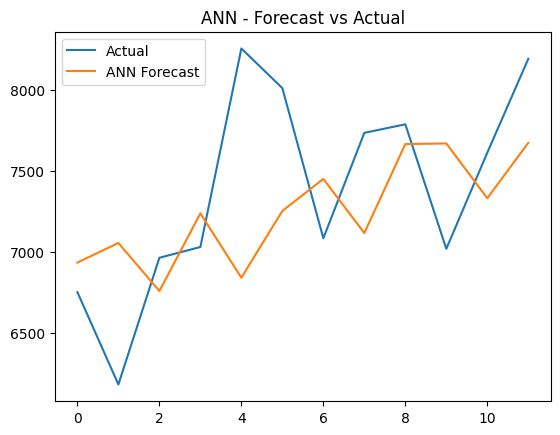

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
RNN RMSE: 610.98


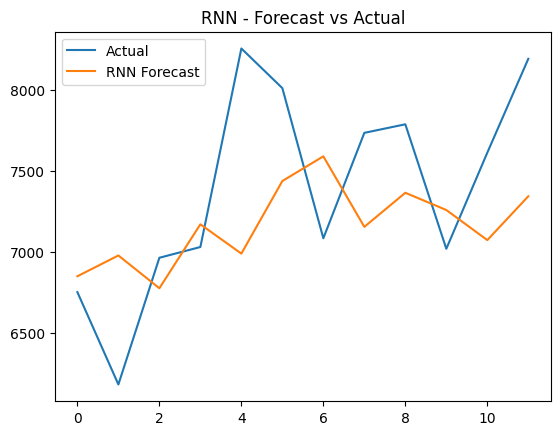

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
LSTM RMSE: 573.62


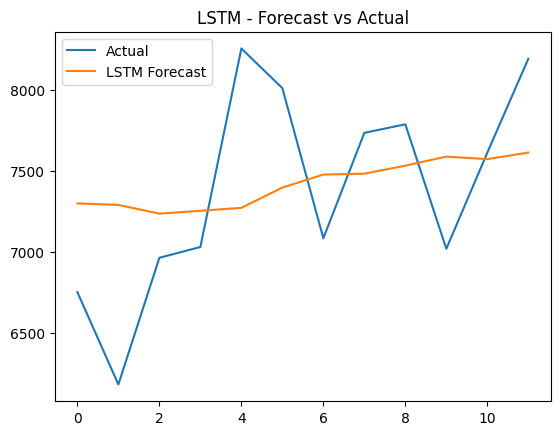

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
GRU RMSE: 545.87


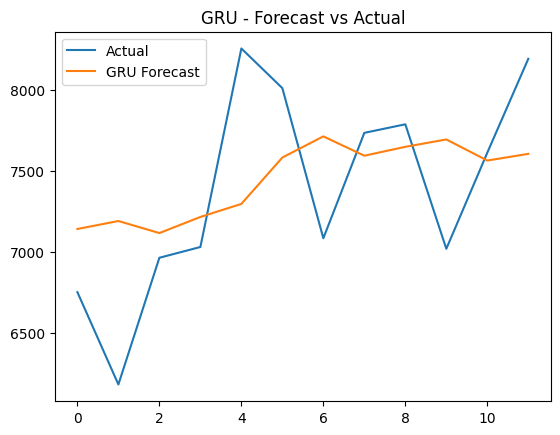

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
CNN RMSE: 577.55


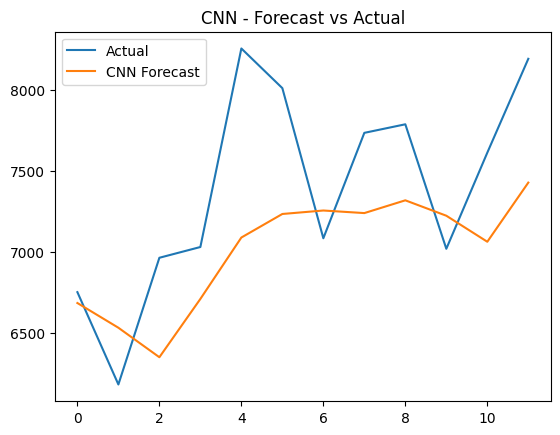

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
DEEP_CNN RMSE: 581.94


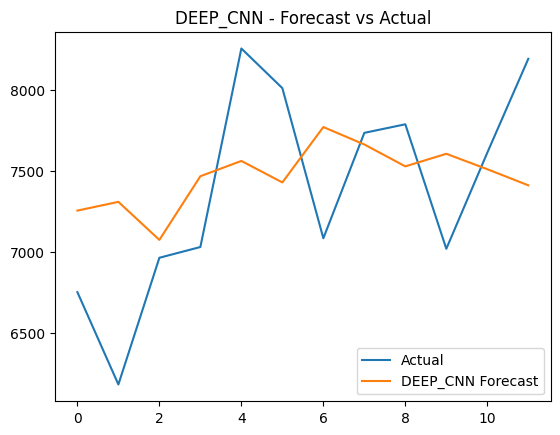

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Deep_LSTM RMSE: 556.80


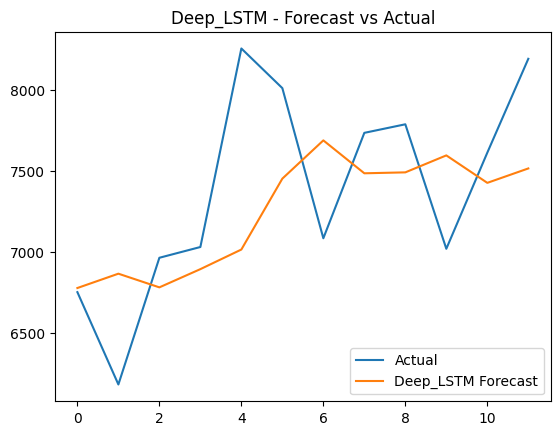

In [151]:
models = {
    'ANN': model_ann,
    'RNN': model_rnn,
    'LSTM': model_lstm,
    'GRU': model_gru,
    'CNN': model_cnn,
    'DEEP_CNN': model_deep_cnn,
    'Deep_LSTM': model_deep_lstm
}

for name, model in models.items():
    preds = model.predict(X_test)
    preds_inv = scaler.inverse_transform(preds)
    actuals_inv = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(actuals_inv, preds_inv))
    print(f"{name} RMSE: {rmse:.2f}")
    
    plt.plot(actuals_inv, label='Actual')
    plt.plot(preds_inv, label=f'{name} Forecast')
    plt.title(f'{name} - Forecast vs Actual')
    plt.legend()
    plt.show()

In [153]:
for name, model in models.items():
    preds = model.predict(X_test)
    preds_inv = scaler.inverse_transform(preds)
    actuals_inv = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(actuals_inv, preds_inv))
    print(f"{name} RMSE: {rmse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
ANN RMSE: 630.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
RNN RMSE: 610.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
LSTM RMSE: 573.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
GRU RMSE: 545.87
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
CNN RMSE: 577.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
DEEP_CNN RMSE: 581.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Deep_LSTM RMSE: 556.80


Prophet:

In [159]:
from prophet import Prophet

c:\Users\Legion\VS_Notebooks\Timeseries project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [163]:
df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet = df_prophet.dropna(subset=['y'])

In [164]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

15:57:30 - cmdstanpy - INFO - Chain [1] start processing
15:57:30 - cmdstanpy - INFO - Chain [1] done processing


In [166]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

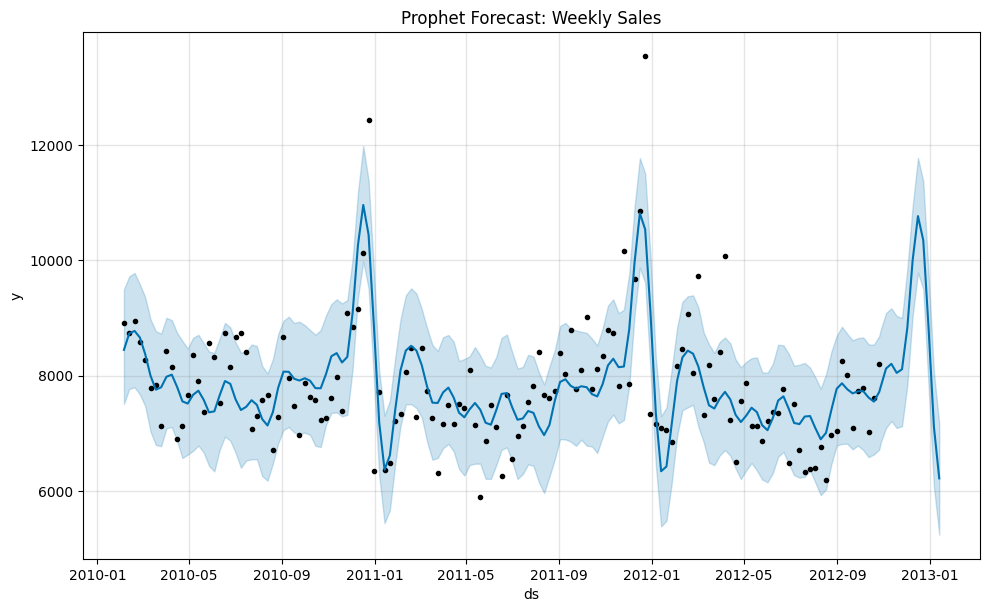

In [ ]:
model.plot(forecast)
plt.title("Prophet Forecast: Weekly Sales")
plt.show()

In [181]:
y_true = df_prophet['y'][-12:].values
y_pred = forecast['yhat'][-12:].values
date_index = df_prophet['ds'][-12:].values

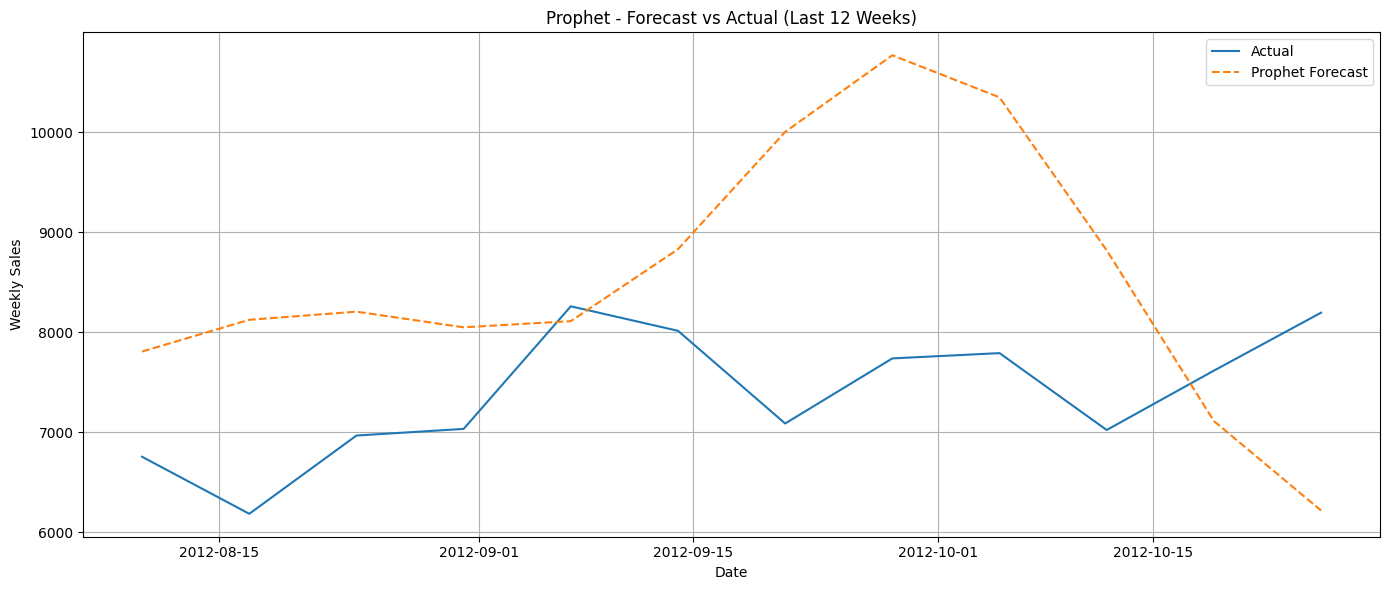

In [182]:
plt.figure(figsize=(14, 6))
plt.plot(date_index, y_true, label='Actual')
plt.plot(date_index, y_pred, label='Prophet Forecast', linestyle='--')
plt.title("Prophet - Forecast vs Actual (Last 12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

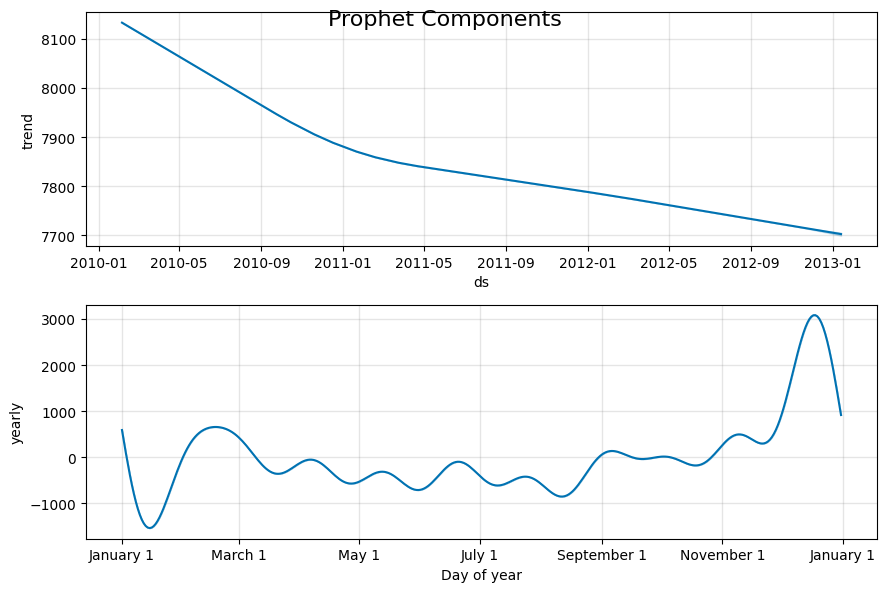

In [169]:
model.plot_components(forecast)
plt.suptitle("Prophet Components", fontsize=16)
plt.show()

In [170]:
y_true = df_prophet['y'][-12:].values
y_pred = forecast['yhat'][-12:].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Prophet RMSE: {rmse:.2f}")

Prophet RMSE: 1821.21


Save Best Model:

In [219]:
from tensorflow.keras.models import load_model, save_model
import joblib

In [220]:
model_gru.save("gru_model.h5")

In [212]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']